In [1]:
#Dependencies
import pandas as pd
import tweepy
from datetime import datetime as dt
from datetime import date
from datetime import timedelta
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from time import strftime
import math

from IPython.core.display import HTML

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from apikeys import consumer_key, consumer_secret, access_token, access_token_secret




import requests
import json
from apikeys import av_key
import pandas as pd
import os
import csv
# import sys
import seaborn as sns

In [2]:
filtered_trump_tweets=pd.read_csv('Resource_CSVs/Filtered_tweets.csv')
main_data=pd.read_csv('Resource_CSVs/Main_data.csv')
filtered_trump_tweets.head()

,Tweet,Date,Retweets,Likes,Keyword,Positive,Negative,Neutral,Compound
0,rt @realdonaldtrump: six months after our tax ...,2018-06-30,19358,0,tax,0.143,0.143,0.714,0.2500
1,"rt @foxbusiness: .@ivankatrump: ""i think one o...",2018-06-29,7486,0,economy,0.255,0.000,0.745,0.7809
2,"six months after our tax cuts, more than 6 mil...",2018-06-29,19358,84145,tax,0.155,0.155,0.690,0.2500
3,"today, we broke ground on a plant that will pr...",2018-06-28,22046,96233,jobs,0.000,0.134,0.866,-0.4753
4,"today, we broke ground on a plant that will pr...",2018-06-28,22046,96233,jobs,0.000,0.134,0.866,-0.4753


In [3]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


## Filtered Tweets Sentiment Breakdown


880


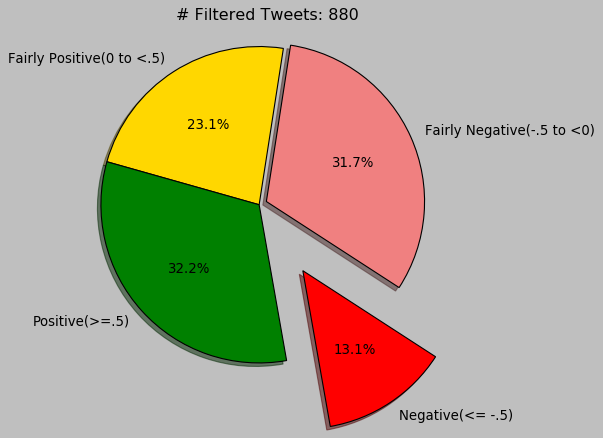

In [4]:
#creating categories 
bins = (-1,-.5,0,.5,1)
compound_groups = ['Negative','Fairly Negative','Fairly Positive','Positive']

filtered_trump_tweets['Sentiment Ranking'] = pd.cut(filtered_trump_tweets["Compound"], bins, labels=compound_groups)

print(len(filtered_trump_tweets))

Sentiments_pct = 100 * filtered_trump_tweets.groupby(["Sentiment Ranking"]).count()['Tweet'] / filtered_trump_tweets["Tweet"].count()

plt.style.use('classic')

plt.title(f"# Filtered Tweets: {len(filtered_trump_tweets)}\n")

plt.pie(Sentiments_pct,
        autopct='%.1f%%',
        labels=['Negative(<= -.5)', 'Fairly Negative(-.5 to <0)', 'Fairly Positive(0 to <.5)', 'Positive(>=.5)'], 
        colors=['Red', 'lightcoral', 'gold', 'green'], 
        explode=[.5, .05, 0,0], 
        startangle=280,
        shadow=True,
        )
plt.axis("equal")



plt.savefig("Images/sentimentspie.png")

plt.show()



## Important Days

### Largest Gains

In [5]:
# list(main_data)

### same day

In [6]:

SP500Samedaychange = main_data[main_data['S&P500 Same-Day Change']==main_data['S&P500 Same-Day Change'].max()]
SP500Samedaychange['Event'] = "Largest S&P500 Same Day Gain"
NASSameDayChange = main_data[main_data['NAS Same-Day Change']==main_data['NAS Same-Day Change'].max()]
NASSameDayChange['Event'] = "Largest NAS Same Day Gain"
DJSameDayChange = main_data[main_data['DJ Same-Day Change']==main_data['DJ Same-Day Change'].max()]
DJSameDayChange['Event'] = "Largest DJ Same Day Gain"

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [7]:
frames1 = [SP500Samedaychange, NASSameDayChange, DJSameDayChange]
SameDayMax = pd.concat(frames1)

SameDayMax = SameDayMax.drop(['Negative','Neutral','Positive','index','S&P500 1-Day Change','S&P500 2-Day Change','DJ 1-Day Change',
                                      'DJ 2-Day Change','NAS 1-Day Change','NAS 2-Day Change'], axis=1).set_index('Event')


SameDayMax.head()



,Date,Likes,Retweets,Compound,S&P500 Open,S&P500 Close,DJ Open,DJ Close,NAS Open,NAS Close,...,Insurance Same-Day Change,Insurance 1-Day Change,Oil Same-Day Change,Oil 1-Day Change,Semiconductor Same-Day Change,Semiconductor 1-Day Change,Telecom Same-Day Change,Telecom 1-Day Change,Utility Same-Day Change,Utility 1-Day Change
Event,,,,,,,,,,,,,,,,,,,,,
Largest S&P500 Same Day Gain,2018-02-23,115062,24193,0.53715,2715.8000,2747.3000,25050.5098,25309.9902,7261.3501,7337.3901,...,0.61,0.97,2.16,-0.08,1.08,2.16,1.35,2.28,2.55,-0.34
Largest NAS Same Day Gain,2018-02-23,115062,24193,0.53715,2715.8000,2747.3000,25050.5098,25309.9902,7261.3501,7337.3901,...,0.61,0.97,2.16,-0.08,1.08,2.16,1.35,2.28,2.55,-0.34
Largest DJ Same Day Gain,2017-11-30,163107,32644,0.50015,2633.9299,2647.5801,24013.8008,24272.3496,6852.7998,6873.9702,...,-0.61,-0.05,1.11,3.26,-0.19,-1.09,-0.57,0.15,0.32,-0.35


In [23]:
# samedaygainlist = SameDayMax['Date'].unique().tolist() 
# samedaygainlist

# #Filtered tweets based on keywords and defined variables to hold
# filtered_tweet_texts = []
# filtered_created_date =[]
# filtered_retweets=[]
# filtered_likes=[]
# filtered_id=[]
# keys=[]

# # Looping through tweets
# for tweet in filtered_trump_tweets.iterrows():
#     for day in samedaygainlist:
# #         #Used regular expression to find specific tweets based on keyword
# #         if day == filtered_trump_tweets['Date']
#         if re.search(day,tweet[1]['Date']):
#             #Not all tweets will have keyword, catching tweets that match
#             try:
#                 filtered_tweet_texts.append(tweet[1]["Tweet"])
#                 filtered_created_date.append(tweet[1]["Date"])
# #                 #                 i += 1   
#             except:
#                     print('Missing Data')                      
# #Create new dictionary for filtered tweets

# Maxday_trump_tweets = {
#                 "Tweet" : filtered_tweet_texts,
#                 "Date" : filtered_created_date
    
#                          }    
# Maxday_trump_tweets = pd.DataFrame(Maxday_trump_tweets)
# Maxday_trump_tweets    

###  Two day change

In [24]:
SP5002daychange = main_data[main_data['S&P500 2-Day Change']==main_data['S&P500 2-Day Change'].max()]
SP5002daychange['Event'] = "Largest S&P500 2 Day Gain"
NAS2DayChange = main_data[main_data['NAS 2-Day Change']==main_data['NAS 2-Day Change'].max()]
NAS2DayChange['Event'] = "Largest NAS 2 Day Gain"
DJ2DayChange = main_data[main_data['DJ 2-Day Change']==main_data['DJ 2-Day Change'].max()]
DJ2DayChange['Event'] = "Largest DJ 2 Day Gain"

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [25]:
frames2 = [SP5002daychange, NAS2DayChange, DJ2DayChange]
TwoDayMax = pd.concat(frames2)

TwoDayMax = TwoDayMax.drop(['Negative','Neutral','Positive','index','S&P500 1-Day Change','S&P500 Same-Day Change','DJ 1-Day Change',
                                      'DJ Same-Day Change','NAS 1-Day Change','NAS Same-Day Change'], axis=1).set_index('Event')


TwoDayMax.head()

,Date,Likes,Retweets,Compound,S&P500 Open,S&P500 Close,DJ Open,DJ Close,NAS Open,NAS Close,...,Insurance Same-Day Change,Insurance 1-Day Change,Oil Same-Day Change,Oil 1-Day Change,Semiconductor Same-Day Change,Semiconductor 1-Day Change,Telecom Same-Day Change,Telecom 1-Day Change,Utility Same-Day Change,Utility 1-Day Change
Event,,,,,,,,,,,,,,,,,,,,,
Largest S&P500 2 Day Gain,2018-05-03,77915,15672,0.7345,2628.0801,2629.73,23836.2305,23930.1504,7065.0298,7088.1499,...,-0.21,1.28,-0.77,1.4,1.48,2.31,0.44,1.56,-0.01,0.37
Largest NAS 2 Day Gain,2018-05-03,77915,15672,0.7345,2628.0801,2629.73,23836.2305,23930.1504,7065.0298,7088.1499,...,-0.21,1.28,-0.77,1.4,1.48,2.31,0.44,1.56,-0.01,0.37
Largest DJ 2 Day Gain,2018-05-03,77915,15672,0.7345,2628.0801,2629.73,23836.2305,23930.1504,7065.0298,7088.1499,...,-0.21,1.28,-0.77,1.4,1.48,2.31,0.44,1.56,-0.01,0.37


In [26]:
#tweets from that day

### Largest Losses

In [27]:
SP5002dayloss = main_data[main_data['S&P500 Same-Day Change']==main_data['S&P500 Same-Day Change'].min()]
SP500Samedayloss['Event'] = "Largest S&P500 Same Day Loss"
NASSameDayloss = main_data[main_data['NAS Same-Day Change']==main_data['NAS Same-Day Change'].min()]
NASSameDayloss['Event'] = "Largest NAS Same Day Loss"
DJSameDayloss = main_data[main_data['DJ Same-Day Change']==main_data['DJ Same-Day Change'].min()]
DJSameDayloss['Event'] = "Largest DJ Same Day Loss"

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [28]:
frames3 = [SP500Samedayloss, NASSameDayloss, DJSameDayloss]
SameDayMaxLoss = pd.concat(frames3)

SameDayMaxLoss = SameDayMaxLoss.drop(['Negative','Neutral','Positive','index','S&P500 1-Day Change','S&P500 2-Day Change','DJ 1-Day Change',
                                      'DJ 2-Day Change','NAS 1-Day Change','NAS 2-Day Change'], axis=1).set_index('Event')


SameDayMaxLoss.head()

,Date,Likes,Retweets,Compound,S&P500 Open,S&P500 Close,DJ Open,DJ Close,NAS Open,NAS Close,...,Insurance Same-Day Change,Insurance 1-Day Change,Oil Same-Day Change,Oil 1-Day Change,Semiconductor Same-Day Change,Semiconductor 1-Day Change,Telecom Same-Day Change,Telecom 1-Day Change,Utility Same-Day Change,Utility 1-Day Change
Event,,,,,,,,,,,,,,,,,,,,,
Largest S&P500 Same Day Loss,2018-04-24,59396,14635,-0.8388,2680.8,2634.5601,24579.9395,24024.1309,7160.77,7007.3501,...,-0.66,-0.18,-0.84,1.45,-1.82,-0.12,-1.12,0.06,0.4,-0.01
Largest NAS Same Day Loss,2018-04-24,59396,14635,-0.8388,2680.8,2634.5601,24579.9395,24024.1309,7160.77,7007.3501,...,-0.66,-0.18,-0.84,1.45,-1.82,-0.12,-1.12,0.06,0.4,-0.01
Largest DJ Same Day Loss,2018-04-24,59396,14635,-0.8388,2680.8,2634.5601,24579.9395,24024.1309,7160.77,7007.3501,...,-0.66,-0.18,-0.84,1.45,-1.82,-0.12,-1.12,0.06,0.4,-0.01


In [29]:
##tweets for those days


### two day loss

In [18]:
SP5002dayloss = main_data[main_data['S&P500 2-Day Change']==main_data['S&P500 2-Day Change'].min()]
SP5002dayloss['Event'] = "Largest S&P500 2 Day Loss"
NAS2Dayloss = main_data[main_data['NAS 2-Day Change']==main_data['NAS 2-Day Change'].min()]
NAS2Dayloss['Event'] = "Largest NAS 2 Day Loss"
DJ2Dayloss = main_data[main_data['DJ 2-Day Change']==main_data['DJ 2-Day Change'].min()]
DJ2Dayloss['Event'] = "Largest DJ 2 Day Loss"

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [19]:
frames4 = [SP5002dayloss, NAS2Dayloss, DJ2Dayloss]
TwoDayMaxLoss = pd.concat(frames4)

TwoDayMaxLoss = TwoDayMaxLoss.drop(['Negative','Neutral','Positive','index','S&P500 1-Day Change','S&P500 Same-Day Change','DJ 1-Day Change',
                                      'DJ Same-Day Change','NAS 1-Day Change','NAS Same-Day Change'], axis=1).set_index('Event')


TwoDayMaxLoss.head()

,Date,Likes,Retweets,Compound,S&P500 Open,S&P500 Close,DJ Open,DJ Close,NAS Open,NAS Close,...,Insurance Same-Day Change,Insurance 1-Day Change,Oil Same-Day Change,Oil 1-Day Change,Semiconductor Same-Day Change,Semiconductor 1-Day Change,Telecom Same-Day Change,Telecom 1-Day Change,Utility Same-Day Change,Utility 1-Day Change
Event,,,,,,,,,,,,,,,,,,,,,
Largest S&P500 2 Day Loss,2018-02-02,105461,26481,0.6124,2808.9199,2762.1299,26061.7891,25520.9609,7347.5898,7240.9502,...,-1.28,-3.57,-3.12,-4.27,-1.74,-4.72,-1.31,-4.50,-0.34,-1.61
Largest S&P500 2 Day Loss,2018-02-27,106486,24986,0.8441,2780.4500,2744.2800,25735.7793,25410.0293,7416.1699,7330.3501,...,-0.20,-1.51,-1.66,-3.57,-0.31,-0.92,-1.22,-0.49,-1.85,-0.55
Largest NAS 2 Day Loss,2018-02-07,110008,21173,0.7003,2690.9500,2681.6599,24892.8691,24893.3496,7086.2002,7051.9800,...,0.47,-3.26,-2.75,-4.02,-1.19,-4.23,0.54,-3.97,-0.26,-1.15
Largest DJ 2 Day Loss,2018-02-27,106486,24986,0.8441,2780.4500,2744.2800,25735.7793,25410.0293,7416.1699,7330.3501,...,-0.20,-1.51,-1.66,-3.57,-0.31,-0.92,-1.22,-0.49,-1.85,-0.55


###tweets

In [17]:
# maxsamedaychange = main_data[main_data['Same Day Change']==main_data['Same Day Change'].max()]
# maxsamedaychange['Event'] = "Largest Same Day Gain"
# maxtwodaychange = main_data[main_data['Two Day Change']==main_data['Two Day Change'].max()]
# maxtwodaychange['Event'] = "Largest Two Day Gain"
# maxcompound = main_data[main_data['Compound']==main_data['Compound'].max()]
# maxcompound['Event'] = "Most Positive Comment"
# minsamedaychange = main_data[main_data['Same Day Change']==main_data['Same Day Change'].min()]
# minsamedaychange['Event'] = "Largest Same Day Loss"
# mintwodaychange = main_data[main_data['Two Day Change']==main_data['Two Day Change'].min()]
# mintwodaychange['Event'] = "Largest Two Day Loss"
# mincompound = main_data[main_data['Compound']==main_data['Compound'].min()]
# mincompound['Event'] = "Most Negative Comment"
# mostlikedtweets = main_data[main_data['Likes']==main_data['Likes'].max()]